# Sigmoid Function: the Heart of Logistic Regression

While Linear Regression makes predictions by directly calculating the output, Logistic Regression does it differently. Instead of directly predicting the output, Logistic Regression calculates a raw model output, then transforms it using the sigmoid function, mapping it to a range between 0 and 1, thus making it a probability.

The sigmoid function is defined as $S(x) = \dfrac{1}{1+e^{-x}}$ 

Can be implemented in python as:

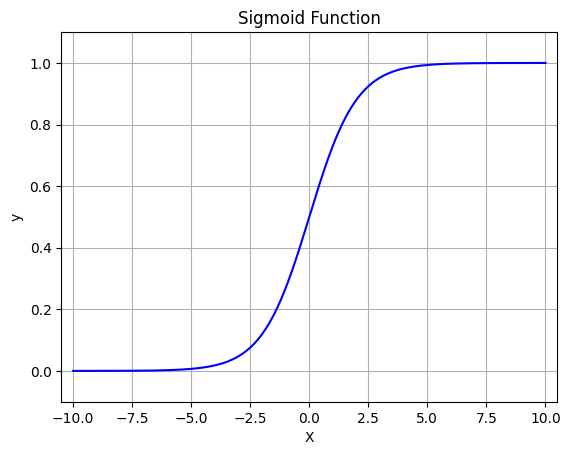

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-10,10,2000)
y = sigmoid(x)
plt.plot(x ,y, c='b')
plt.grid(True),
plt.xlabel("X")
plt.ylabel('y')
plt.xlim([-10.5,10.5])
plt.ylim([-0.1,1.1])
plt.title("Sigmoid Function")
plt.show()


The feature of long positive input is close to 1, and long negative input is 0, makes it a perfect fit when we want to classify emails into two categories: "spam" or "not-spam".

## Understanding Logistic Regression

The mathematical form of Logistic Regression can be expressed as follows:

$$P(Y = 1|x) = \dfrac{1}{1+e^{\beta_0 + \beta_1 \cdot x}}$$
Where:
- $P(Y = 1|x)$ is the probability of event Y = 1 given x
- $\beta_0$ an $\beta_1$ are the parameters models.
- x is the input variable
- $\beta_0$ + $\beta_1 \cdot$ x is the linear combination of parameters and feature(s)

And the `Cost Function` of the Logistic Regression can be expressed as:
$$ -[y \cdot log(\hat{p}) + (1-y)log(1- \hat{p})]$$
Where:
- $\hat{p}$ denotes the predicted probability

Can be implemented as:

In [ ]:
def cost_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

## Implementing Logistic Regression with Gradient Descent

In [ ]:
def logistic_regression(X, y, num_iterations, learning_rate):
    # Add intercept to X
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)

    # Weights initialization
    theta = np.zeros(X.shape[1])

    for i in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= learning_rate * gradient

        z = np.dot(X, theta)
        h = sigmoid(z)
        loss = cost_function(h, y)

        if i % 10000 == 0:
            print(f'Loss: {loss}\t')

    return theta

### Example

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def logistic_regression(X, y, num_iterations, learning_rate):
    # Add intercept to X
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)

    # Weights initialization
    theta = np.zeros(X.shape[1])

    for i in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= learning_rate * gradient

        z = np.dot(X, theta)
        h = sigmoid(z)
        loss = cost_function(h, y)

        if i % 10000 == 0:
            print(f'Loss after {i} iterations: {loss}\t')

    return theta

def predict_prob(X, theta):
    # Add intercept to X
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    return sigmoid(np.dot(X, theta))

def predict(X, theta, threshold=0.5):
    return predict_prob(X, theta) >= threshold

np.random.seed(0)
num_observations = 1000
x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)
X = np.vstack((x1, x2)).astype(np.float32)
y = np.hstack((np.zeros(num_observations), np.ones(num_observations)))

# Split into train and test
train_ratio = 0.7
idx = int(X.shape[0] * train_ratio)
X_train, X_test = X[:idx, :], X[idx:, :]
y_train, y_test = y[:idx], y[idx:]

# Training
theta = logistic_regression(X_train, y_train, num_iterations = 30000, learning_rate = 0.1)

# Prediction and Accuracy calculation
y_pred = predict(X_test, theta)
accuracy = (y_pred == y_test).mean()
print('Accuracy:', accuracy)

Loss after 0 iterations: 0.6560020538325616	
Loss after 10000 iterations: 0.015463551362280403	
Loss after 20000 iterations: 0.012145084291705443	
Accuracy: 0.995
